In [16]:
import numpy as np
import matplotlib.pyplot as plt

Task 2.5C

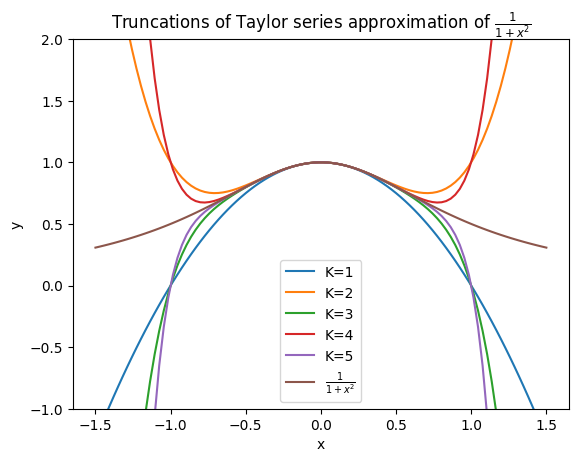

In [17]:
#Taylor series approximation of 1/(1+x^2) 
def taylor_series(x, n_terms):
    series_sum = 0
    for n in range(n_terms + 1):
        term = (-1)**n * x**(2*n)
        series_sum += term
    return series_sum

# Plotting
x = 0.5
n_terms = 10
for K in range(1,6):
    x = np.linspace(-1.5,1.5,100)
    y = taylor_series(x, K)
    plt.plot(x, y, label=f'K={K}')
plt.plot(x, 1/(1+np.power(x, 2)), label=r'$\frac{1}{1+x^2}$')
plt.legend()
plt.title(r'Truncations of Taylor series approximation of $\frac{1}{1+x^2}$')
plt.ylim(-1,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Task 2.2.3

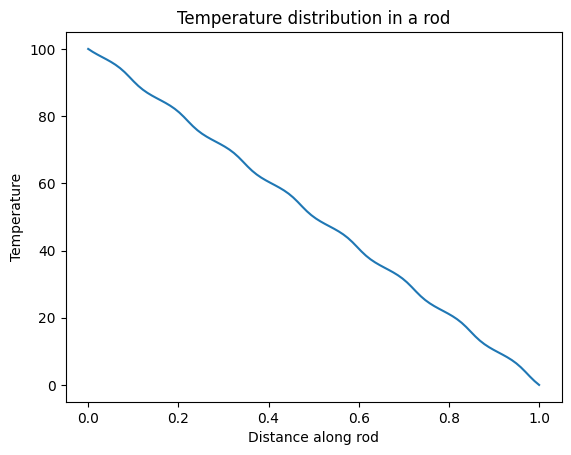

In [18]:
from scipy.integrate import solve_bvp
# Define BVs
T0 = 100  
Ta = 0  
#ODE solver for non-dimensionalised heat equation for d(x) = sin(x/2)+3
def solve_ode(bc, domain, n_points=100, y_guess=None):
   
    def ode_system(x, Y):
        dy_dx = Y[1]
        d2y_dx2 = -(50*dy_dx*np.cos(50*x))/(np.sin(50*x)+3)  
        return np.vstack([dy_dx, d2y_dx2])
    x_vals = np.linspace(domain[0], domain[1], n_points)
    
    if y_guess is None:
        y_guess = np.zeros((2, n_points)) 

    solution = solve_bvp(ode_system, bc, x_vals, y_guess)

    if not solution.success:
        raise RuntimeError("ODE solver failed to converge!")

    return x_vals, solution

domain = (0, 1)
bc = lambda y0, y1: np.array([y0[0] - T0, y1[0] - Ta])

#solve ode and plot
x_vals, sol = solve_ode(bc, domain, n_points=100)
plt.plot(x_vals, sol.sol(x_vals)[0])
plt.xlabel('Distance along rod')
plt.ylabel("Temperature")
plt.title('Temperature distribution in a rod')
plt.show()